In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt


data = fetch_california_housing()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
results = {}

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_linear = model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
results["Linear"] = (mse_linear, r2_linear, model.coef_)

In [4]:
degrees = [2,3,4,5,6]  

mse_values = []
r2_values = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred_poly = model.predict(X_test_poly)

    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    mse_values.append(mse_poly)
    r2_values.append(r2_poly)
    results[f"Poly {degree}"] = (mse_poly, r2_poly, model.coef_)

In [5]:
for model_name, (mse, r2, coef) in results.items():
    print(f"{model_name}: MSE = {mse:.3f}, R2 = {r2:.3f}")
    if isinstance(coef, np.ndarray):
        print(f"Коефіцієнти: {coef[:5]} ... (показано 5 коефіцієнтів з {len(coef)})")


Linear: MSE = 0.556, R2 = 0.576
Коефіцієнти: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06] ... (показано 5 коефіцієнтів з 8)
Poly 2: MSE = 0.464, R2 = 0.646
Коефіцієнти: [ 6.02531552e-08 -1.19367676e+01 -8.42630148e-01  7.88415388e+00
 -3.83231204e+01] ... (показано 5 коефіцієнтів з 45)
Poly 3: MSE = 23.824, R2 = -17.181
Коефіцієнти: [ 1.32380362e-04 -6.84669880e+01  1.43538066e+01  7.42483563e+01
  2.25325290e+01] ... (показано 5 коефіцієнтів з 165)
Poly 4: MSE = 1646.273, R2 = -1255.304
Коефіцієнти: [ 1.01715837e-04 -2.15557876e-05 -9.65328919e-07 -1.35456189e-07
 -7.79908496e-08] ... (показано 5 коефіцієнтів з 495)
Poly 5: MSE = 47320.089, R2 = -36109.931
Коефіцієнти: [-4.84059823e-09 -1.62943074e-07  2.15299390e-10  1.08175743e-12
 -8.00906521e-11] ... (показано 5 коефіцієнтів з 1287)
Poly 6: MSE = 14882.299, R2 = -11355.988
Коефіцієнти: [-2.44036226e-14  9.21096650e-13 -2.23972676e-15  1.36592562e-15
  9.80928107e-16] ... (показано 5 коефіцієнт

Найкраща модель: Poly 2


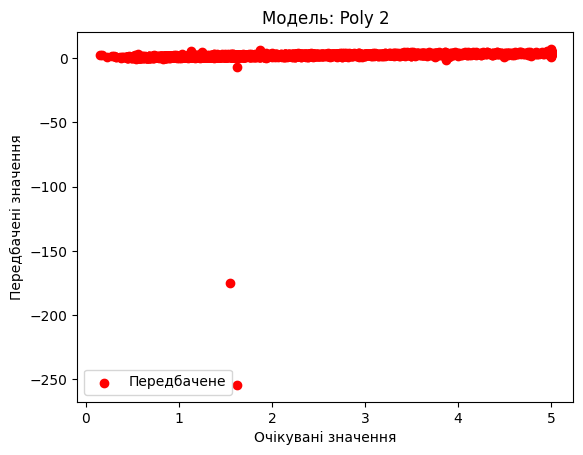

In [6]:
best_model_name = min(results, key=lambda x: results[x][0])
print(f"Найкраща модель: {best_model_name}")

best_poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())  
best_poly_model.fit(X_train, y_train)
y_pred_best = best_poly_model.predict(X_test)

plt.scatter(y_test, y_pred_best, color='red', label='Передбачене')
plt.xlabel("Очікувані значення")
plt.ylabel("Передбачені значення")
plt.title(f"Модель: {best_model_name}")
plt.legend()
plt.show()


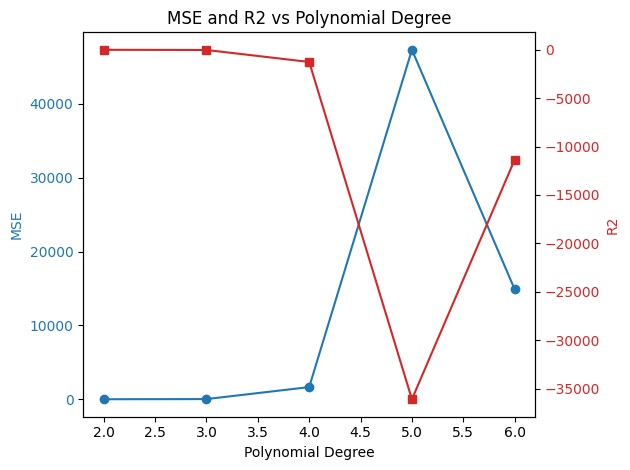

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('MSE', color=color)
ax1.plot(degrees, mse_values, color=color, marker='o', label="MSE")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('R2', color=color)  
ax2.plot(degrees, r2_values, color=color, marker='s', label="R2")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('MSE and R2 vs Polynomial Degree')
fig.tight_layout() 
plt.show()

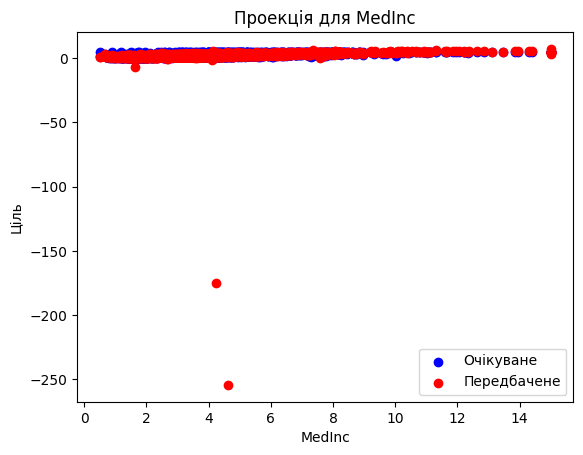

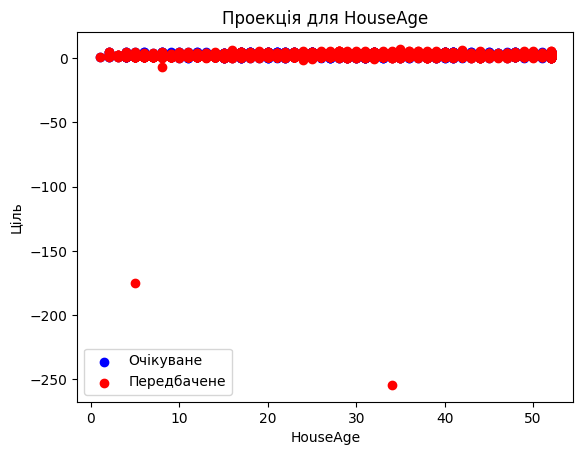

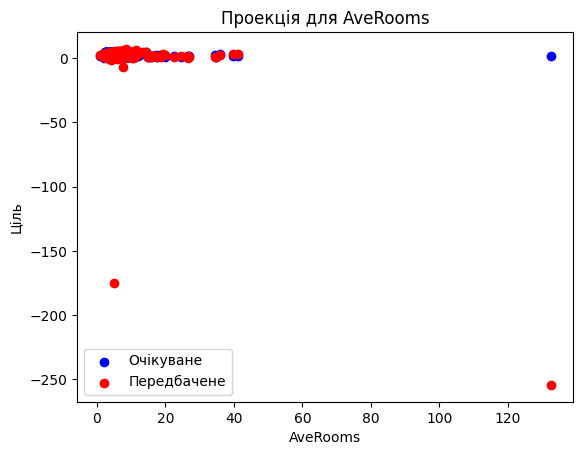

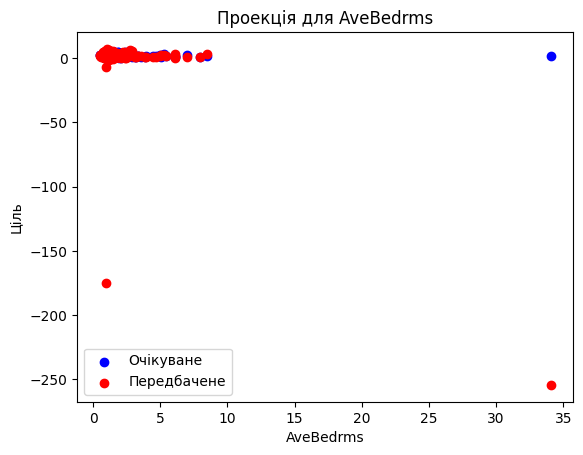

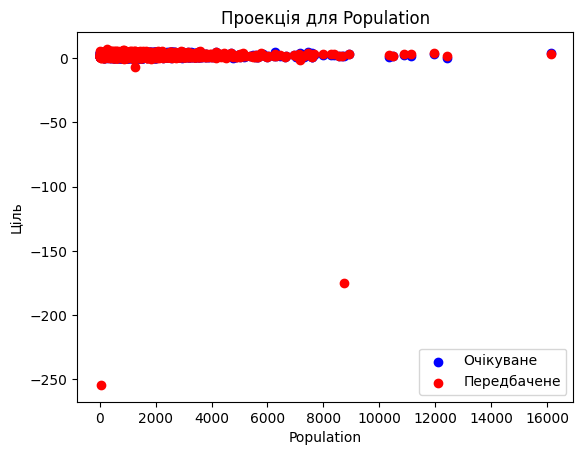

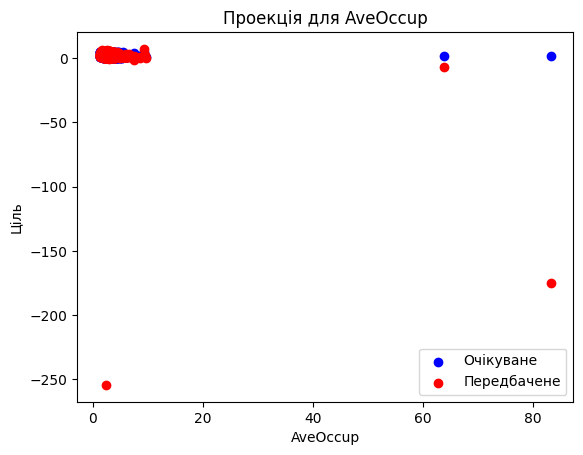

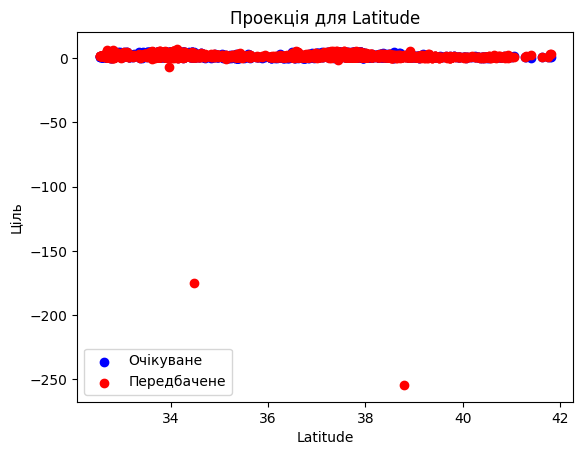

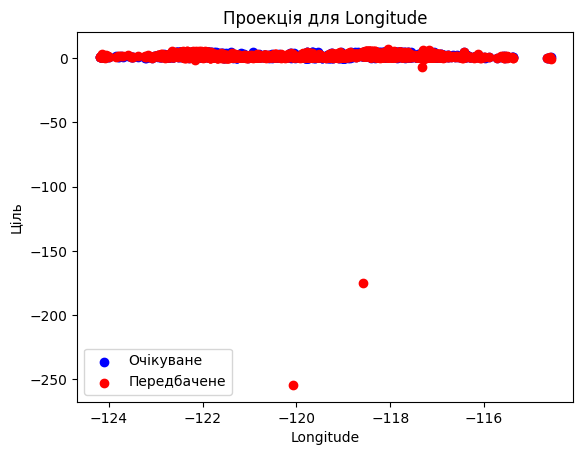

In [8]:
for i in range(X.shape[1]):
    plt.scatter(X_test[:, i], y_test, color='blue', label='Очікуване')
    plt.scatter(X_test[:, i], y_pred_best, color='red', label='Передбачене')
    plt.xlabel(data.feature_names[i])
    plt.ylabel("Ціль")
    plt.title(f"Проекція для {data.feature_names[i]}")
    plt.legend()
    plt.show()
